# Selezione degli Eventi dovuti ai Cosmici
Il programma di seguito permette di selezionare tra gli eventi rivelati quelli effettivamente dovuti ai cosmici.
A seconda che il dataset sia della configurazione di $autotrigger$ o di $coincidenza$ il programma analizza diversamente i dati

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ROOT as root

Welcome to JupyROOT 6.16/00


Apro il file $.root$ come di consueto e salvo i dati in appositi array

In [15]:
choice = 'Cosmici' #'Cosmici' o 'self'

fileROOT = root.TFile('../PMTgem/'+choice+'PMTgem_410.root')#"chargeDataBlu.root") #nome del rootfile
tree = fileROOT.Get("t1") #nome del datatree

n = 1024
nDat = 4*n #numero dati per evento
nEvts = tree.GetEntries() #numero di eventi

#creo due array vuoti per salvare wave_array e time_array del .root

wave = np.zeros((nEvts,nDat))
time = np.zeros((nEvts,nDat))

#eseguo un ciclo sul tree e salvo i dati dentro gli array come ulteriori array...
#quindi adesso avrò array 2d in cui il primo indice si riferisce all'evento e il secondo al dato 
#contenuto dentro quell'evento
i=0
for dat in tree:
    wave[i] = np.array(dat.wave_array)
    time[i] = np.array(dat.time_array)
    i = i+1

In [16]:
waveCh1 = np.zeros((nEvts,n))
waveCh2 = np.zeros((nEvts,n))
waveCh3 = np.zeros((nEvts,n))
waveCh4 = np.zeros((nEvts,n))

timeCh1 = np.zeros((nEvts,n))
timeCh2 = np.zeros((nEvts,n))
timeCh3 = np.zeros((nEvts,n))
timeCh4 = np.zeros((nEvts,n))


print(waveCh1.shape , nDat/4)

for i in range(nEvts):
    for j in range(nDat):
        if j < nDat/4:
            waveCh1[i][j] = wave[i][j]
            timeCh1[i][j] = time[i][j]
        elif j >= nDat/4 and j < nDat/2:
            waveCh2[i][j-n] = wave[i][j]
            timeCh2[i][j-n] = time[i][j]
        elif j >= nDat/2 and j < nDat*3/4:
            waveCh3[i][j-2*n] = wave[i][j]
            timeCh3[i][j-2*n] = time[i][j]
        elif j >= nDat*3/4: 
            waveCh4[i][j-3*n] = wave[i][j]
            timeCh4[i][j-3*n] = time[i][j]


((1000, 1024), 1024)


trovo i files da eliminare perchè errori del DRS

In [17]:
j= 0
for i in range(nEvts):
    if min(waveCh4[i]) < -90 and waveCh4[i].argmin() < 5: 
        print(i , waveCh4[i].argmin() , timeCh4[i][waveCh4[i].argmin()])
        j = j+1
print(j)


(8, 1, 0.9928385615348816)
(203, 1, 0.9928385615348816)
(205, 1, 0.9928385615348816)
(443, 1, 0.9928385615348816)
(632, 1, 0.9928385615348816)
(763, 1, 0.9928385615348816)
(777, 1, 0.9928385615348816)
(935, 1, 0.9928385615348816)
8


Di seguito vengono estratti solo i dati utilizzabili, cioè quei dati non corrotti dal DRS, e copiati in due nuovi array di dimensioni opportune. Quindi a seconda del dataset scelto il programma procede nell'identificazione degli eventi riconducibili a cosmici.

In [18]:
waveCh4New = np.zeros((nEvts-j,n))
waveCh1New = np.zeros((nEvts-j,n))
k = 0
for i in np.arange(1,nEvts):
    #butto gli eventi con il picco strano e copio Ch1 e Ch4 in nuovi array
    if min(waveCh4[i]) >= -110 or (min(waveCh4[i])< -110  and waveCh4[i].argmin() != 1):
        waveCh4New[k] = waveCh4[i]
        waveCh1New[k] = waveCh1[i]
        k = k+1
        
segnale = []
trigger = []
if choice == 'Cosmici':
    find = 0
    for i in range(k):
        if min(waveCh4New[i])<-20:
            segnale.append(waveCh4New[i])
            trigger.append(waveCh1New[i])
            find += 1

    segnale = np.array(segnale)
    trigger = np.array(trigger)

elif choice == 'self':
    find = 0
    for i in range(k):
        if min(waveCh1New[i]) < -100 and waveCh1New[i][waveCh1New[i].argmin()+1] < -100:
            #print(i , min(waveCh1New[i]))
            segnale.append(waveCh4New[i])
            trigger.append(waveCh1New[i])
            find += 1

    if find == 0 : print('Nessuna coincidenza trovata...')
    else: 
        segnale = np.array(segnale)
        trigger = np.array(trigger)
print('Ci sono %d coincidenze rilevate'%(find))

Ci sono 319 coincidenze rilevate


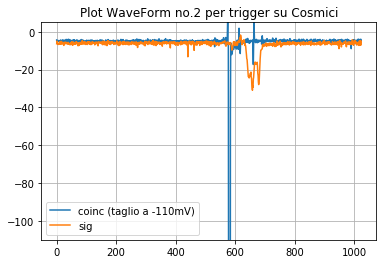

In [54]:
N = 2
plt.title('Plot WaveForm no.%d per trigger su %s'%(N,choice))
plt.plot(trigger[N] , label = 'coinc (taglio a -110mV)')
plt.plot(segnale[N] , label = 'sig')#-20mV')
plt.ylim((-110,5))
#plt.xlim((400,900))
plt.grid()
plt.legend()
plt.show()

In [53]:
execfile('selfFilter.py')